In [1]:
import nltk
import pymorphy2
import gensim
import pyLDAvis

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
name = '"Sociology2017"'
f_in2 = open('Text2017.txt', 'r')
text = f_in2.read()\

In [4]:
print (text)

"При выработке позиции Госдумы по законопроекту о декриминализации побоев депутаты руководствовались соцопросами. Они показали, что почти 60% россиян поддерживают более мягкое отношение к незначительным конфликтам в семье.

На Совете Государственной Думы во вторник обсуждали резонансный законопроект, который выводит побои в отношении близких родственников из разряда уголовных преступлений, если они зафиксированы впервые. В среду на пленарном заседании депутаты рассмотрят документ во втором чтении, напоминает ""ТВ Центр"".
Вносимые поправки должны исправить ошибки и пробелы в семейном праве. Так, например, сейчас даже за небольшую ссору в семье с применением насилия предусмотрено наказание до двух лет тюрьмы, а за избиение родственников с тяжелыми последствиями грозит всего четыре месяца. По словам спикера Думы Вячеслава Володина, прежде чем принимать такой закон, были проведены социологические исследования и более 50% опрошенных высказались за смягчение законодательства в этой сфере.
"

In [5]:
tokens = [t for t in text.split()] 
print (tokens)

['"При', 'выработке', 'позиции', 'Госдумы', 'по', 'законопроекту', 'о', 'декриминализации', 'побоев', 'депутаты', 'руководствовались', 'соцопросами.', 'Они', 'показали,', 'что', 'почти', '60%', 'россиян', 'поддерживают', 'более', 'мягкое', 'отношение', 'к', 'незначительным', 'конфликтам', 'в', 'семье.', 'На', 'Совете', 'Государственной', 'Думы', 'во', 'вторник', 'обсуждали', 'резонансный', 'законопроект,', 'который', 'выводит', 'побои', 'в', 'отношении', 'близких', 'родственников', 'из', 'разряда', 'уголовных', 'преступлений,', 'если', 'они', 'зафиксированы', 'впервые.', 'В', 'среду', 'на', 'пленарном', 'заседании', 'депутаты', 'рассмотрят', 'документ', 'во', 'втором', 'чтении,', 'напоминает', '""ТВ', 'Центр"".', 'Вносимые', 'поправки', 'должны', 'исправить', 'ошибки', 'и', 'пробелы', 'в', 'семейном', 'праве.', 'Так,', 'например,', 'сейчас', 'даже', 'за', 'небольшую', 'ссору', 'в', 'семье', 'с', 'применением', 'насилия', 'предусмотрено', 'наказание', 'до', 'двух', 'лет', 'тюрьмы,', 'а'

In [6]:
import string
def tokenizer(text):
    for elem in set(string.punctuation + '«»…—'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())
tokens = tokenizer(text)
print(tokens)

['при', 'выработке', 'позиции', 'госдумы', 'по', 'законопроекту', 'о', 'декриминализации', 'побоев', 'депутаты', 'руководствовались', 'соцопросами', 'они', 'показали', 'что', 'почти', 'россиян', 'поддерживают', 'более', 'мягкое', 'отношение', 'к', 'незначительным', 'конфликтам', 'в', 'семье', 'на', 'совете', 'государственной', 'думы', 'во', 'вторник', 'обсуждали', 'резонансный', 'законопроект', 'который', 'выводит', 'побои', 'в', 'отношении', 'близких', 'родственников', 'из', 'разряда', 'уголовных', 'преступлений', 'если', 'они', 'зафиксированы', 'впервые', 'в', 'среду', 'на', 'пленарном', 'заседании', 'депутаты', 'рассмотрят', 'документ', 'во', 'втором', 'чтении', 'напоминает', 'тв', 'центр', 'вносимые', 'поправки', 'должны', 'исправить', 'ошибки', 'и', 'пробелы', 'в', 'семейном', 'праве', 'так', 'например', 'сейчас', 'даже', 'за', 'небольшую', 'ссору', 'в', 'семье', 'с', 'применением', 'насилия', 'предусмотрено', 'наказание', 'до', 'двух', 'лет', 'тюрьмы', 'а', 'за', 'избиение', 'род

In [7]:
bag_of_words = tokenizer(text)

In [8]:
word_us_numb = len(bag_of_words)
print('The number of total word usage in the book', name, ': ', word_us_numb)

The number of total word usage in the book "Sociology2017" :  29215


In [9]:
set_of_words = set(bag_of_words)
word_form_numb = len(set_of_words)
print('The number of different word forms in the book', name, ': ', word_form_numb)

The number of different word forms in the book "Sociology2017" :  7646


In [10]:
lens_of_words = [len(word) for word in bag_of_words]
print('Average word length in the book', name, ': ', round(sum(lens_of_words)/len(lens_of_words),2))

Average word length in the book "Sociology2017" :  6.19


In [11]:
import collections as cl #библиотека для подсчета в списке количества элементов
from matplotlib import pyplot as plt #библиотека для построения диаграммы
get_ipython().run_line_magic('matplotlib', 'inline')
dist_distr = cl.Counter(lens_of_words)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

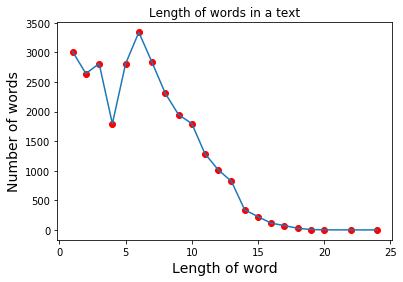

In [12]:
plt.title('Length of words in a text')
plt.xlabel('Length of word', fontsize=14)
plt.ylabel('Number of words', fontsize=14)
plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [13]:
bag_of_sentences = [sent for sent in text.split('.') if (sent != '') ]
list_of_bags = [tokenizer(sent) for sent in bag_of_sentences]
lens_of_sentences = [len(list) for list in list_of_bags]
average_len_of_sentence = round(sum(lens_of_sentences)/len(lens_of_sentences), 2)
print('Average length of sentence in the text', name, ': ', average_len_of_sentence)

Average length of sentence in the text "Sociology2017" :  15.87


In [14]:
dist_distr = cl.Counter(lens_of_sentences)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

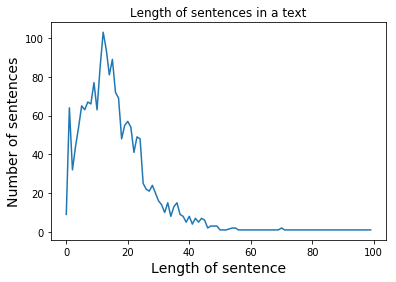

In [15]:
plt.title('Length of sentences in a text')
plt.xlabel('Length of sentence', fontsize=14)
plt.ylabel('Number of sentences', fontsize=14)
#plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [ ]:
# Cleam tokens without stopwords 

In [16]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [17]:
clean_tokens = tokens[:] 
sr = stopwords.words('russian')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

In [18]:
freq = nltk.FreqDist(clean_tokens) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

выработке:1
позиции:2
госдумы:10
законопроекту:2
декриминализации:1
побоев:1
депутаты:3
руководствовались:1
соцопросами:1
показали:4
россиян:44
поддерживают:9
мягкое:1
отношение:16
незначительным:1
конфликтам:1
семье:3
совете:1
государственной:6
думы:6
вторник:1
обсуждали:1
резонансный:1
законопроект:3
который:29
выводит:1
побои:1
отношении:6
близких:1
родственников:2
разряда:1
уголовных:1
преступлений:1
зафиксированы:1
впервые:4
среду:3
пленарном:1
заседании:1
рассмотрят:1
документ:1
втором:1
чтении:1
напоминает:1
тв:1
центр:53
вносимые:1
поправки:3
должны:10
исправить:1
ошибки:3
пробелы:1
семейном:1
праве:2
например:47
небольшую:2
ссору:1
применением:1
насилия:1
предусмотрено:2
наказание:1
двух:6
лет:21
тюрьмы:1
избиение:1
тяжелыми:1
последствиями:1
грозит:1
четыре:2
месяца:4
словам:11
спикера:2
вячеслава:1
володина:1
прежде:6
принимать:2
закон:6
проведены:4
социологические:6
исследования:39
опрошенных:19
высказались:5
смягчение:1
законодательства:5
сфере:6
реально:7
это:223
брак:3
п

консервативен:1
помощью:3
общаться:5
общественное:15
штука:2
производящаяся:1
опросами:3
перформативны:1
пьера:1
бурдьё:3
знаменитая:1
статья:1
большому:2
сожалению:7
многие:6
неправильно:3
поняли:4
сделал:2
возможные:1
оговорки:1
смысле:7
фикция:1
обращать:1
внимание:7
подобного:1
прямо:5
продукт:2
деятельности:8
опросных:3
компаний:4
безусловно:10
видим:9
оно:6
играет:4
бoльшую:1
роль:4
технологиях:1
лишь:13
предустановленная:1
независимая:2
нейтрально:1
измеряется:1
репрезентируется:1
опросом:3
различии:1
консерватизма:6
российской:13
провинции:1
госпропаганды:1
страхе:1
революции:17
мешает:2
опыт:8
внимательного:1
сознания:1
малых:2
методами:2
отличными:1
ваши:4
полевые:1
консерватизме:3
истории:10
нашего:6
немного:1
другие:21
задачи:3
одну:3
могу:6
результате:5
очевидно:4
бывает:8
разный:1
консерватизм:8
само:5
слово:4
путает:1
проясняет:1
одна:20
повесток:1
вырастающих:1
снизу:2
локалистская:1
местническая:1
отчасти:1
консервативна:1
насколько:9
видеть:2
чаще:1
реализовать:2
крае

деморализует:1
вызывает:3
подавленную:1
весьма:5
очевидную:1
пассивную:1
агрессию:1
нехватка:1
стороне:3
мировых:2
тенденций:5
центре:7
всплеск:2
народного:3
недовольства:5
реакция:5
узурпировали:3
технократы:1
посчитавшие:1
общества:16
решить:1
хороших:1
рецептов:1
разбирающиеся:1
пришли:1
неолиберальной:1
ситуации:16
подавляющее:2
устраивает:2
осознанной:1
форме:4
начинают:2
важное:3
консервативные:2
рефлексы:1
make:1
america:2
great:1
again:1
подымается:1
колен:1
американские:1
избиратели:1
ка:1
сдайте:1
задумываясь:1
потребовать:1
возвращения:1
мировой:1
процессы:2
деполитизации:1
перехода:2
технократам:1
замены:1
политики:9
экономикой:1
последствия:2
переживаем:1
элементы:1
составляют:3
традиционную:1
опасностях:1
использования:3
интеллигенция:3
сегодняшней:2
упомянул:1
любишь:1
используют:3
понятие:3
прокомментировать:1
разногласия:1
эгидой:1
colta:2
ru:7
разделе:1
недавно:6
опубликован:1
текст:1
андрея:1
архангельского:1
вызвавший:1
бурную:1
читателей:1
либерального:1
портала:1


отверг:3
обвинения:4
ангажированности:3
заметил:1
инициативным:1
провел:4
тимаковой:3
неумной:2
реакцией:2
потребовал:1
секретаря:3
лживое:3
утверждение:3
извиняться:1
отказалась:2
хотела:2
вступать:2
заочную:2
полемику:2
руководством:5
„левады“:1
заявила:5
читаем:1
заголовки:3
захоронить:4
тело:6
ленина:9
показал:2
известия:1
лента:1
ру:2
выступило:4
захоронение:2
тела:2
ознакомиться:1
самим:3
всё:13
дают:4
повода:1
столь:4
категоричными:1
ссылка:2
https:2
wciom:1
index:1
php:1
id:1
uid:1
утверждения:3
заголовках:1
большой:16
натяжки:1
итак:2
последние:12
желающих:3
меньше:6
цифра:4
упала:1
настоящем:1
го:3
ответил:4
уйдет:1
поколение:1
ленин:2
дорог:4
количество:8
увеличилось:4
подмена:2
ответивших:2
приравнивают:1
необходимцам:1
цифры:5
суммируются:1
подаётся:1
выступление:1
требование:1
попутно:1
осуществяется:1
захоронен:1
законам:1
намеренно:2
вводят:1
заблуждение:2
оставить:1
мавзолее:3
кореллирует:1
данными:4
главной:4
непримиримых:1
перетекло:1
плохого:2
ч:4
счёт:2
определивиш

принявшие:1
автоматически:1
записываются:1
поддержавшие:1
перевода:1
открытия:1
этажах:1
магазинов:1
офисов:1
молчуны:1
помогали:1
бизнесу:1
достучаться:1
процедуре:2
поставить:2
фиктивную:1
подпись:2
схватится:1
итоги:4
данный:2
пункт:1
узакониванием:1
существующей:1
практики:2
молчунами:1
сомнительной:1
правовой:3
учитывая:1
сжатые:4
определенный:3
узнает:1
пятых:1
удивляет:1
проводится:4
указания:1
дома–:1
конкретных:1
кварталов:1
архитектурных:1
планируется:2
дать:4
информированное:1
согласие:3
информированный:1
отказ:1
документа:2
имеющего:1
юридическую:1
описывал:1
правовые:1
согласия:1
несогласия:1
жителя:1
шестых:1
выпущенные:1
постановлению:1
делающие:1
социальных:11
нанимателей:1
представителями:2
города:5
интересы:4
представляли:1
районные:1
гуисы:1
ставят:2
неясный:1
проводящиеся:1
москву:2
гуис:1
управа:1
надлежащим:1
уведомить:1
позволяют:1
входящем:1
первоначально:5
грубым:1
нарушением:1
противоречит:1
аспектах:1
законодательству:2
несет:1
серьезную:1
угрозу:2
правила:1


противоречия:1
выскажется:1
наперекор:1
общему:1
воспитана:1
исследованиях:2
тридцать:2
поверьте:1
моему:1
опыту:1
обязательно:1
специальные:2
приемы:3
помогают:2
выявить:5
позволяющие:1
проверить:1
искренность:1
коллажи:1
склейте:1
коллаж:1
политическая:2
оптимистический:1
пессимистический:1
подбирают:1
нужные:1
склеивают:1
первой:1
части:2
крокус:2
вылез:1
снега:1
распустился:1
распустившийся:1
засыпан:1
снегом:1
вылезем:1
передряг:1
реформ:2
придем:1
нормально:1
бах:1
валится:1
спрашиваю:1
последовательности:1
замкнутый:1
круг:3
словами:1
отвечая:1
анкете:2
медведь:2
мордой:1
передними:1
лапами:1
растекаются:1
разноцветные:1
лужи:1
растоптал:1
нарочно:1
обманывают:1
интервьюера:2
обман:1
вскроется:1
наших:4
фокус:12
группах:3
словах:1
картинках:1
проективных:1
методик:1
методики:2
точнее:2
ориентируется:1
распространенную:1
группе:7
восемь:2
плюс:1
минус:1
проекте:1
четырех:2
двадцати:1
групп:6
проследить:2
спектр:1
группы:5
приступая:1
развернутый:1
полный:1
точек:1
группам:1
довер

критериев:4
упоминаемость:3
участника:3
ресурсах:3
запросивший:3
обошел:3
скромные:3
володину:3
нужен:4
дешевые:3
социсследования:3
потратили:7
трансперенси:3
интернешнл:3
собеседник:6
госконтракты:3
агентства:3
занимавшиеся:3
предвыборным:3
пиаром:3
кандидатов:7
ер:3
има:6
консалтинг:6
чиновники:3
благодарят:3
политтехнологов:3
партию:3
гендиректор:3
вартан:3
саркисов:3
письменный:3
контрольный:3
звонок:4
собеседником:3
отказывается:3
газету:3
звонили:3
неудобными:3
вопросами:6
узнавал:3
направили:3
электронной:3
почте:3
конкретными:3
возможного:3
многословном:3
ответе:3
обошла:3
стороной:3
ограничившись:3
заверением:3
выигрываются:3
№:3
фз:6
партнеры:3
качественно:6
надлежащие:6
механизмом:3
обратной:5
целях:4
управленческих:3
указанное:3
реализуется:3
открытого:3
конкурса:3
квалификация:3
исполнителя:3
критерием:3
аукциона:3
победитель:3
определяется:5
цены:3
реализации:6
сумма:3
определена:3
техническом:3
задании:3
включает:3
выборочной:3
совокупности:3
материалов:4
готовящихся:3
с

объективно:1
существующее:1
проведенному:1
уважением:1
симпатией:1
относящихся:1
сухие:1
строчки:1
цифр:1
правителей:1
брежнев:1
сталин:1
население:2
желает:1
стабильном:1
сильным:1
национальным:1
правителем:1
отстаивающим:1
образовательного:1
культурного:1
открывает:1
предпочитает:1
женские:1
романы:1
фантастику:1
популярность:1
псевдонаучных:1
передач:1
динозавры:1
появились:1
планете:1
солнце:1
вращается:1
примечательно:1
честность:1
верят:1
колдовство:1
ясновидение:1
аналитические:1
заставили:1
существование:1
предоставленной:1
центральными:1
телеканалами:1
изменилось:1
внешнеполитический:1
ввоз:1
импортного:1
продовольствия:1
настроено:1
возвращение:2
реалий:1
плановой:1
искусстве:1
устав:1
пошлости:1
балл:1
бога:1
уверена:1
треть:1
православных:1
пестрят:1
задавался:1
берутся:1
побеседовали:1
дмитрием:1
рогозиным:1
кандидатом:1
полевым:1
интервьюером:1
специалистов:3
xx:11
век:11
знакомых:1
своеобразное:1
восемьдесят:1
завязана:1
вузы:1
готовят:1
международной:1
когнитивные:1
пси

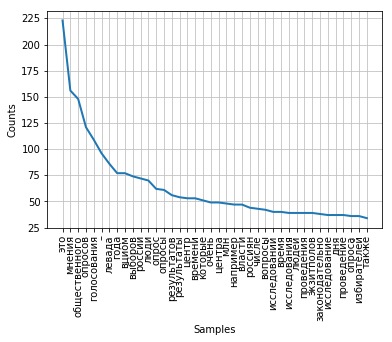

In [19]:
get_ipython().run_line_magic('matplotlib', 'inline')
freq.plot(40, cumulative=False)

In [20]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
morph = pymorphy2.MorphAnalyzer()
dict = [morph.parse(word) for word in clean_tokens] #обработанный с помощью парсера словарь слов с информацией о каждом слове
normal_forms = [word[0].normal_form for word in dict]
print(normal_forms)

['выработка', 'позиция', 'госдума', 'законопроект', 'декриминализация', 'побои', 'депутат', 'руководствоваться', 'соцопрос', 'показать', 'россиянин', 'поддерживать', 'мягкий', 'отношение', 'незначительный', 'конфликт', 'семья', 'совет', 'государственный', 'дума', 'вторник', 'обсуждать', 'резонансный', 'законопроект', 'который', 'выводить', 'побои', 'отношение', 'близкие', 'родственник', 'разряд', 'уголовный', 'преступление', 'зафиксировать', 'впервые', 'среда', 'пленарный', 'заседание', 'депутат', 'рассмотреть', 'документ', 'второе', 'чтение', 'напоминать', 'тв', 'центр', 'вносить', 'поправка', 'должный', 'исправить', 'ошибка', 'пробел', 'семейный', 'право', 'например', 'небольшой', 'ссора', 'семья', 'применение', 'насилие', 'предусмотреть', 'наказание', 'два', 'год', 'тюрьма', 'избиение', 'родственник', 'тяжёлый', 'последствие', 'грозить', 'четыре', 'месяц', 'слово', 'спикер', 'дума', 'вячеслав', 'володин', 'прежде', 'принимать', 'закон', 'провести', 'социологический', 'исследование',

In [22]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

выработка:1
позиция:12
госдума:13
законопроект:9
декриминализация:1
побои:2
депутат:13
руководствоваться:1
соцопрос:40
показать:11
россиянин:49
поддерживать:17
мягкий:2
отношение:45
незначительный:2
конфликт:15
семья:11
совет:4
государственный:31
дума:8
вторник:1
обсуждать:4
резонансный:1
который:200
выводить:1
близкие:5
родственник:2
разряд:1
уголовный:2
преступление:1
зафиксировать:4
впервые:4
среда:11
пленарный:1
заседание:2
рассмотреть:5
документ:4
второе:10
чтение:3
напоминать:2
тв:1
центр:123
вносить:2
поправка:5
должный:26
исправить:3
ошибка:9
пробел:1
семейный:3
право:12
например:47
небольшой:6
ссора:1
применение:4
насилие:2
предусмотреть:5
наказание:2
два:28
год:163
тюрьма:1
избиение:1
тяжёлый:3
последствие:3
грозить:1
четыре:8
месяц:13
слово:27
спикер:8
вячеслав:6
володин:9
прежде:6
принимать:12
закон:20
провести:48
социологический:58
исследование:128
опросить:30
высказаться:6
смягчение:1
законодательство:38
сфера:11
реально:7
это:241
брак:3
принятие:8
вызвать:8
дискуссия:4
о

гражданский:8
война:6
неплохой:2
укрепление:1
скобка:1
выноситься:1
значительный:4
часть:16
настоящий:5
серьёзный:6
ход:15
поменяться:1
шествовать:1
иной:10
нежели:1
консерватор:7
страшно:5
перепугать:2
элемент:8
испуг:2
современный:15
элита:5
панический:2
перерастать:1
изменение:3
самостоятельный:2
движение:7
люба:8
народный:5
активность:2
отсюда:4
необходимость:3
сочинить:1
миф:3
интересно:5
купить:2
либерал:10
слышимый:1
противоположный:3
знак:1
специальный:4
ментальность:1
особый:9
архетип:1
колея:2
ехать:1
выйти:4
непонятно:1
видимо:6
царь:1
горох:1
примкнуть:1
мифический:1
низовой:1
сталкиваться:4
адекватный:2
остановить:1
уметь:6
ценить:1
шаг:3
вобрать:1
продуктивный:1
предполагать:3
опор:1
существующий:7
социальный:36
единство:1
приемлет:1
кругом:1
личный:5
обогащение:1
успех:3
опираться:6
коллективный:2
сила:12
локалиста:1
искать:3
порой:1
антилиберальный:1
широкий:3
свобода:7
навязывание:2
коллективистский:1
мобилизовать:2
панически:1
испуганный:2
общенациональный:1
обратный:

лекция:2
краудфандинг:1
договор:4
суборганизация:1
пожертвование:2
заинтересовать:1
контакт:1
партнёр:13
ес:1
the:5
eu:1
russia:2
centre:2
бельгия:1
изучение:22
study:1
policy:2
великобритания:5
usaid:1
генрих:1
бёлля:1
heinrich:1
boll:1
stiftung:2
форд:1
ford:1
foundation:1
фридрих:1
науманный:1
friedrich:1
naumann:1
западной:1
список:3
представленный:1
freedom:1
house:1
составление:1
economist:1
special:1
report:1
on:1
указанный:19
разработка:2
последующий:3
перспектива:5
основать:1
углублённый:1
неправительственный:1
объединение:1
ти:1
октябрь:12
передать:1
департамент:2
вестись:1
активист:4
региональный:7
содержимый:2
вовлечение:1
протестный:1
актив:1
персональный:4
особенность:4
программа:25
подготовка:4
разработчик:1
законодатель:3
training:1
program:1
russian:1
and:1
opinion:2
makers:1
ставиться:1
отобрать:2
перспективный:1
дальнейший:1
март:13
партнерство:2
мемориал:1
дискуссионный:1
семинар:3
половина:5
посвятить:4
общественно:10
польша:1
чехословакия:1
изучаться:1
методология

телевизионный:4
транслировать:1
аборт:1
катастрофический:1
аналогия:3
землетрясение:1
прилагать:1
линейка:1
стол:1
измерить:2
длина:1
секунда:1
объяснять:3
тема:9
иллюстрировать:1
дима:1
яковлев:1
выразить:6
двадцать:3
идеологизация:1
неблагонадёжность:1
транзит:1
устройство:3
протяжение:2
десятилетие:3
анализировать:2
изучать:10
сталин:3
репрессия:2
сталинский:1
проблематика:1
задание:4
сиюминутный:1
продолжение:1
многолетний:1
различный:6
политолог:4
политтехнолог:4
избирательно:1
нуждающийся:1
меньший:1
оценивать:2
ничтожный:1
прокремлёвский:1
губернаторский:1
обеспечение:3
плата:6
политтехнология:1
лестный:1
оценочный:1
скромно:1
несомненно:1
подлежать:2
решающий:2
масштаб:1
скидка:1
осмысление:1
определение:2
выдвижение:1
курс:4
любопытный:1
ужесточить:1
диалог:2
выиграть:10
конкурс:12
госзакупка:4
начальный:1
заявка:4
сумма:4
подавать:1
академия:1
хозяйство:1
ромиро:4
заняться:1
выявление:7
предложить:9
комитет:2
госстроительство:1
отмена:3
терроризм:1
выдача:1
гражданство:1
собе

зеландия:2
фиджи:2
филиппина:2
южный:2
япония:2
продолжительность:1
двое:1
запрещаться:1
коммунальный:1
мэр:1
завершиться:2
фиджийский:1
декрет:1
видеоматериал:1
участковый:2
досрочный:1
ближний:2
восток:1
ближневосточный:1
азиатский:1
израиль:2
ирак:1
кувейт:1
ливан:1
палестина:1
проведени:1
индекс:7
сигнализировать:2
слабый:3
суммарный:3
колебаться:2
летний:6
проявлять:4
преклонный:3
заметно:2
лдпр:2
львов:1
своевременный:1
переоценить:1
ощущать:1
интуитивно:1
расширяться:1
мобильный:4
приложение:1
незаменимый:1
свидетельствовать:2
минимум:2
таков:1
приурочить:1
профессия:1
ежегодно:1
волнующий:1
присказка:1
пережить:1
способный:2
взрыв:1
бытовой:1
обстановка:1
двор:1
катастрофичный:1
беспокоиться:1
глубинка:1
мегаполис:1
оптимист:1
достигать:1
межнациональный:1
позитив:1
уверить:3
впереди:1
трудный:1
животрепещущий:1
весной:1
памятовать:1
существование:3
раскачать:1
беспокоить:1
локомотив:1
повести:1
несанкционированный:1
уличный:1
совместно:1
росмолодёжь:1
минобразования:1
радость:

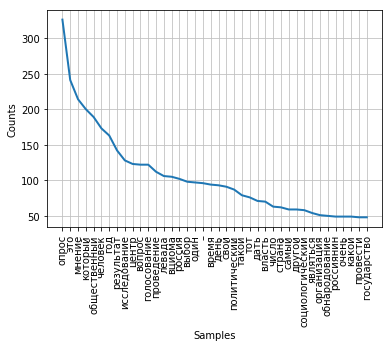

In [23]:
from nltk import FreqDist
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [24]:
lemms = list(set(normal_forms))
print('The number of unique lemmas in', name, ': ', len(lemms)) #число лем - длина набора нормальных форм

The number of unique lemmas in "Sociology2017" :  4243


In [25]:
noun_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='NOUN')] #существительные находятся по тегу NOUN
print('The number of unique lemmas in nouns: ', len(set(noun_lemms)))

The number of unique lemmas in nouns:  1878


In [26]:
import numpy as np

In [27]:
set_noun_lemms = list(set(noun_lemms))
noun_occurs = [normal_forms.count(word) for word in set_noun_lemms] #встречаемость каждой леммы сущ в тексте
arr = np.array(noun_occurs)
top_noun_index = arr.argsort()[::-1]
top_noun = set_noun_lemms[top_noun_index[0]] #самое частотное существительное
print('The 1-st place from the most frequent nouns in the text', name, ' is taken by the word "', set_noun_lemms[top_noun_index[0]], '", that is used ', noun_occurs[top_noun_index[0]], ' times')

The 1-st place from the most frequent nouns in the text "Sociology2017"  is taken by the word " опрос ", that is used  326  times


In [28]:
adj_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='ADJF' or word[0].tag.POS=='ADJS')] #прилагательные находятся по тегам ADJF и ADJS
print('The number of unique lemmas in adjectives', name, ': ', len(set(adj_lemms)))

The number of unique lemmas in adjectives "Sociology2017" :  796


In [29]:
set_adj_lemms = list(set(adj_lemms))
adj_occurs = [normal_forms.count(word) for word in set_adj_lemms] #встречаемость каждой леммы прил в тексте
arr = np.array(adj_occurs)
top_adj_index = arr.argsort()[::-1]
top_adj = set_adj_lemms[top_adj_index[0]] #самое частотное прилагательное
print('The 1-st place from the most frequent adjectives in the text', name, ' is taken by the word "', set_adj_lemms[top_adj_index[0]], '", that is used ', adj_occurs[top_adj_index[0]], ' times')

The 1-st place from the most frequent adjectives in the text "Sociology2017"  is taken by the word " который ", that is used  200  times


In [30]:
verb_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='VERB' or word[0].tag.POS=='INFN')] #глаголы находятся по тегам VERB и INF
print('The number of unique lemmas in verbs', name, ': ', len(set(verb_lemms)))

The number of unique lemmas in verbs "Sociology2017" :  933


In [31]:
set_verb_lemms = list(set(verb_lemms))
verb_occurs = [normal_forms.count(word) for word in set_verb_lemms] #встречаемость каждой леммы глаг в тексте
arr = np.array(verb_occurs)
top_verb_index = arr.argsort()[::-1]
top_verb = set_verb_lemms[top_verb_index[0]] #самый частотный глагол
print('The 1-st place from the most frequent verbs in the text', name, ' is taken by the word "', set_verb_lemms[top_verb_index[0]], '", that is used ', verb_occurs[top_verb_index[0]], ' times')

The 1-st place from the most frequent verbs in the text "Sociology2017"  is taken by the word " дать ", that is used  71  times


In [ ]:
# Bigrams 

In [32]:
word = "вциома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  вциома  +  глава :  8  times
2 .  вциома  +  год :  5  times
3 .  вциома  +  рубль :  4  times
4 .  вциома  +  опрос :  4  times
5 .  вциома  +  исследование :  4  times
6 .  вциома  +  мнение :  4  times
7 .  вциома  +  государственный :  3  times
8 .  вциома  +  область :  3  times
9 .  вциома  +  комментарий :  3  times
10 .  вциома  +  стать :  3  times
11 .  вциома  +  респондент :  3  times
12 .  вциома  +  развитие :  3  times
13 .  вциома  +  обвинять :  3  times
14 .  вциома  +  участие :  3  times
15 .  вциома  +  персонал :  3  times
16 .  вциома  +  руководство :  3  times
17 .  вциома  +  служба :  3  times
18 .  вциома  +  июнь :  3  times
19 .  вциома  +  контракт :  3  times
20 .  вциома  +  получить :  3  times
21 .  вциома  +  партнёр :  3  times
22 .  вциома  +  данные :  3  times
23 .  вциома  +  выиграть :  3  times
24 .  вциома  +  руководитель :  3  times
25 .  вциома  +  цена :  3  times
26 .  вциома  +  сообщение :  2  times
27 .  вциома  +  фома :  2  tim

In [33]:
word = "фома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  фома  +  левада :  1  times
2 .  фома  +  вроде :  1  times
3 .  фома  +  вциома :  1  times
4 .  фома  +  игрок :  1  times


In [34]:
word = "левада"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  левада  +  директор :  9  times
2 .  левада  +  опрос :  7  times
3 .  левада  +  провести :  5  times
4 .  левада  +  юрий :  5  times
5 .  левада  +  глава :  4  times
6 .  левада  +  дать :  3  times
7 .  левада  +  кроме :  2  times
8 .  левада  +  исследование :  2  times
9 .  левада  +  год :  2  times
10 .  левада  +  замечательный :  2  times
11 .  левада  +  сотрудник :  2  times
12 .  левада  +  центр :  2  times
13 .  левада  +  институт :  2  times
14 .  левада  +  вциома :  2  times
15 .  левада  +  ранее :  2  times
16 .  левада  +  фамилия :  1  times
17 .  левада  +  пресловутый :  1  times
18 .  левада  +  проект :  1  times
19 .  левада  +  либерализация :  1  times
20 .  левада  +  событие :  1  times
21 .  левада  +  евгений :  1  times
22 .  левада  +  музыка :  1  times
23 .  левада  +  случай :  1  times
24 .  левада  +  гудков :  1  times
25 .  левада  +  александр :  1  times
26 .  левада  +  финансирование :  1  times
27 .  левада  +  самый :  1  times
28

In [35]:
word = "доверять"
tnb = [] #создается и заполняется список слов, образующих биграммы с прилагательным 
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
        tnb.append(normal_forms[i+1])
set_tn = list(set(tnb))
verb_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_verb = np.array(verb_occurs)
top_verb_index = arr_verb.argsort()[::-1]
s = 1
for i in top_verb_index:
    if verb_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', verb_occurs[i], ' times')
        s += 1

1 .  доверять  +  основное :  4  times
2 .  доверять  +  премьера :  3  times
3 .  доверять  +  полностью :  3  times
4 .  доверять  +  глава :  2  times
5 .  доверять  +  мнение :  2  times
6 .  доверять  +  сам :  1  times
7 .  доверять  +  дать :  1  times
8 .  доверять  +  совершенно :  1  times
9 .  доверять  +  наука :  1  times
10 .  доверять  +  респондент :  1  times
11 .  доверять  +  склонный :  1  times
12 .  доверять  +  результат :  1  times
13 .  доверять  +  информация :  1  times
14 .  доверять  +  составлять :  1  times
15 .  доверять  +  массовый :  1  times
16 .  доверять  +  насколько :  1  times
17 .  доверять  +  далее :  1  times
18 .  доверять  +  группа :  1  times
19 .  доверять  +  увеличиться :  1  times
20 .  доверять  +  декабрь :  1  times
21 .  доверять  +  скорее :  1  times
22 .  доверять  +  данные :  1  times
23 .  доверять  +  компания :  1  times
24 .  доверять  +  власть :  1  times
25 .  доверять  +  партия :  1  times
26 .  доверять  +  кома : 

In [36]:
def tokenizer(normal_forms):
    for elem in set(string.punctuation + '-'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())

In [37]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

выработка:1
позиция:12
госдума:13
законопроект:9
декриминализация:1
побои:2
депутат:13
руководствоваться:1
соцопрос:40
показать:11
россиянин:49
поддерживать:17
мягкий:2
отношение:45
незначительный:2
конфликт:15
семья:11
совет:4
государственный:31
дума:8
вторник:1
обсуждать:4
резонансный:1
который:200
выводить:1
близкие:5
родственник:2
разряд:1
уголовный:2
преступление:1
зафиксировать:4
впервые:4
среда:11
пленарный:1
заседание:2
рассмотреть:5
документ:4
второе:10
чтение:3
напоминать:2
тв:1
центр:123
вносить:2
поправка:5
должный:26
исправить:3
ошибка:9
пробел:1
семейный:3
право:12
например:47
небольшой:6
ссора:1
применение:4
насилие:2
предусмотреть:5
наказание:2
два:28
год:163
тюрьма:1
избиение:1
тяжёлый:3
последствие:3
грозить:1
четыре:8
месяц:13
слово:27
спикер:8
вячеслав:6
володин:9
прежде:6
принимать:12
закон:20
провести:48
социологический:58
исследование:128
опросить:30
высказаться:6
смягчение:1
законодательство:38
сфера:11
реально:7
это:241
брак:3
принятие:8
вызвать:8
дискуссия:4
о

нынешний:4
периодически:1
вспыхивать:3
быть:24
спорый:4
замолчать:1
юбилей:1
попытка:8
примирение:1
красных:1
белых:1
якобы:15
добро:1
немножко:3
поспорить:2
развязать:1
гражданский:8
война:6
неплохой:2
укрепление:1
скобка:1
выноситься:1
значительный:4
часть:16
настоящий:5
серьёзный:6
ход:15
поменяться:1
шествовать:1
иной:10
нежели:1
консерватор:7
страшно:5
перепугать:2
элемент:8
испуг:2
современный:15
элита:5
панический:2
перерастать:1
изменение:3
самостоятельный:2
движение:7
люба:8
народный:5
активность:2
отсюда:4
необходимость:3
сочинить:1
миф:3
интересно:5
купить:2
либерал:10
слышимый:1
противоположный:3
знак:1
специальный:4
ментальность:1
особый:9
архетип:1
колея:2
ехать:1
выйти:4
непонятно:1
видимо:6
царь:1
горох:1
примкнуть:1
мифический:1
низовой:1
сталкиваться:4
адекватный:2
остановить:1
уметь:6
ценить:1
шаг:3
вобрать:1
продуктивный:1
предполагать:3
опор:1
существующий:7
социальный:36
единство:1
приемлет:1
кругом:1
личный:5
обогащение:1
успех:3
опираться:6
коллективный:2
сила:1

affairs:1
ipa:1
выделить:8
социально:3
трансформация:1
давно:3
сложиться:4
обходный:1
вариант:7
канал:18
поступление:1
неучитываемый:1
нала:1
выплата:1
гонорар:2
консультация:1
лекция:2
краудфандинг:1
договор:4
суборганизация:1
пожертвование:2
заинтересовать:1
контакт:1
партнёр:13
ес:1
the:5
eu:1
russia:2
centre:2
бельгия:1
изучение:22
study:1
policy:2
великобритания:5
usaid:1
генрих:1
бёлля:1
heinrich:1
boll:1
stiftung:2
форд:1
ford:1
foundation:1
фридрих:1
науманный:1
friedrich:1
naumann:1
западной:1
список:3
представленный:1
freedom:1
house:1
составление:1
economist:1
special:1
report:1
on:1
указанный:19
разработка:2
последующий:3
перспектива:5
основать:1
углублённый:1
неправительственный:1
объединение:1
ти:1
октябрь:12
передать:1
департамент:2
вестись:1
активист:4
региональный:7
содержимый:2
вовлечение:1
протестный:1
актив:1
персональный:4
особенность:4
программа:25
подготовка:4
разработчик:1
законодатель:3
training:1
program:1
russian:1
and:1
opinion:2
makers:1
ставиться:1
отобрат

партия:22
отдать:5
правящий:1
эрдогановский:1
справедливость:1
пср:2
около:12
набрать:1
победить:4
немаловажный:1
спонтанный:1
учёный:5
неумение:1
понятный:1
насущный:1
преходящий:1
телевизионный:4
транслировать:1
аборт:1
катастрофический:1
аналогия:3
землетрясение:1
прилагать:1
линейка:1
стол:1
измерить:2
длина:1
секунда:1
объяснять:3
тема:9
иллюстрировать:1
дима:1
яковлев:1
выразить:6
двадцать:3
идеологизация:1
неблагонадёжность:1
транзит:1
устройство:3
протяжение:2
десятилетие:3
анализировать:2
изучать:10
сталин:3
репрессия:2
сталинский:1
проблематика:1
задание:4
сиюминутный:1
продолжение:1
многолетний:1
различный:6
политолог:4
политтехнолог:4
избирательно:1
нуждающийся:1
меньший:1
оценивать:2
ничтожный:1
прокремлёвский:1
губернаторский:1
обеспечение:3
плата:6
политтехнология:1
лестный:1
оценочный:1
скромно:1
несомненно:1
подлежать:2
решающий:2
масштаб:1
скидка:1
осмысление:1
определение:2
выдвижение:1
курс:4
любопытный:1
ужесточить:1
диалог:2
выиграть:10
конкурс:12
госзакупка:4
нач

намерить:1
нарушить:1
el:1
mercurio:1
эль:1
меркурио:1
должность:1
агрегированный:1
хилари:1
атр:1
азиатско:1
тихоокеанский:1
австралия:2
тимор:2
индия:2
камбоджа:2
зеландия:2
фиджи:2
филиппина:2
южный:2
япония:2
продолжительность:1
двое:1
запрещаться:1
коммунальный:1
мэр:1
завершиться:2
фиджийский:1
декрет:1
видеоматериал:1
участковый:2
досрочный:1
ближний:2
восток:1
ближневосточный:1
азиатский:1
израиль:2
ирак:1
кувейт:1
ливан:1
палестина:1
проведени:1
индекс:7
сигнализировать:2
слабый:3
суммарный:3
колебаться:2
летний:6
проявлять:4
преклонный:3
заметно:2
лдпр:2
львов:1
своевременный:1
переоценить:1
ощущать:1
интуитивно:1
расширяться:1
мобильный:4
приложение:1
незаменимый:1
свидетельствовать:2
минимум:2
таков:1
приурочить:1
профессия:1
ежегодно:1
волнующий:1
присказка:1
пережить:1
способный:2
взрыв:1
бытовой:1
обстановка:1
двор:1
катастрофичный:1
беспокоиться:1
глубинка:1
мегаполис:1
оптимист:1
достигать:1
межнациональный:1
позитив:1
уверить:3
впереди:1
трудный:1
животрепещущий:1
вес

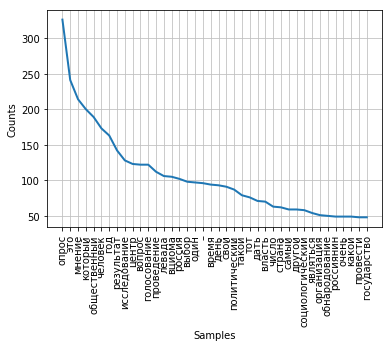

In [38]:
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [ ]:
# How to remove the character "-"? 

In [39]:
bigrams = {word: [] for word in set(normal_forms)} 

In [40]:
for i in range(len(normal_forms)-1): #проходимся по всему списку слов normal_forms (до последнего элемента)
    bigrams[normal_forms[i]].append(normal_forms[i+1]) #добавляем в список биграмм для i-го слова i+1-ое слово

print(bigrams)

{'издание': ['год', 'год', 'год', 'наука'], 'инвестировать': ['большой'], 'парадокс': ['несведущий'], 'люксембург': ['мальта', 'монголия', 'целое', 'последний'], 'элитный': ['район'], 'заканчиваться': ['думать', 'надёжность'], 'кратко': ['маркетинг'], 'согласиться': ['я', 'опросить', 'пройти'], 'энтузиазм': ['конец', 'стать', 'отвечать'], 'мера': ['учиться', 'достигаемый', 'тот', 'нарастать', 'регулярно', 'регулярно', 'регулярно', 'наказание'], 'нежилой': ['помещение'], 'никто': ['хотеть', 'делать', 'неизвестный', 'мы', 'мочь', 'ориентироваться', 'фокус', 'интересовать', 'подозревать'], 'помимо': ['ярлык', 'собственник'], 'крышатновский': ['пояснить'], 'общество': ['знать', 'решить', 'недавно', 'ведущий', 'россия', 'мемориал', 'проводить', 'достаточно', 'влияние', 'яркий', 'целое', 'называть', 'протяжение', 'особенно', 'вызывать', 'работать', 'влияние', 'интерес', 'ломать', 'концепция', 'основа', 'ирония', 'западный', 'заговор', 'система', 'раскрывать', 'доктор', 'управление', 'мнение'

In [41]:
E = {}
for i,a in enumerate(bigrams):
    S = bigrams[a]; S.sort()
    T = {}; c = S[0]; n = 0
    for z in S:
        if z == c: n = n+1
        else: T[c] = n; c = z; n = 1
    T[c] = n
    print(str(i+1),a,T)
    E[a] = [i+1,T]

1 издание {'год': 3, 'наука': 1}
2 инвестировать {'большой': 1}
3 парадокс {'несведущий': 1}
4 люксембург {'мальта': 1, 'монголия': 1, 'последний': 1, 'целое': 1}
5 элитный {'район': 1}
6 заканчиваться {'думать': 1, 'надёжность': 1}
7 кратко {'маркетинг': 1}
8 согласиться {'опросить': 1, 'пройти': 1, 'я': 1}
9 энтузиазм {'конец': 1, 'отвечать': 1, 'стать': 1}
10 мера {'достигаемый': 1, 'наказание': 1, 'нарастать': 1, 'регулярно': 3, 'тот': 1, 'учиться': 1}
11 нежилой {'помещение': 1}
12 никто {'делать': 1, 'интересовать': 1, 'мочь': 1, 'мы': 1, 'неизвестный': 1, 'ориентироваться': 1, 'подозревать': 1, 'фокус': 1, 'хотеть': 1}
13 помимо {'собственник': 1, 'ярлык': 1}
14 крышатновский {'пояснить': 1}
15 общество {'ведущий': 1, 'весь': 1, 'влияние': 2, 'волновать': 1, 'вызывать': 1, 'гораздо': 1, 'доктор': 1, 'достаточно': 1, 'заговор': 1, 'западный': 1, 'знать': 1, 'институт': 1, 'интерес': 1, 'ирония': 1, 'концепция': 1, 'крайне': 1, 'ломать': 1, 'мемориал': 1, 'мнение': 1, 'называть': 

316 центр {'актуальный': 1, 'взять': 1, 'включить': 1, 'внести': 1, 'вносить': 1, 'возглавить': 1, 'вполне': 2, 'всплеск': 1, 'входить': 1, 'вциома': 1, 'выдавать': 1, 'выйти': 1, 'выполнять': 1, 'говорить': 2, 'год': 1, 'давно': 1, 'данные': 1, 'де': 1, 'европа': 1, 'задать': 1, 'заключать': 1, 'закрытый': 1, 'занимать': 1, 'заниматься': 3, 'зафиксировать': 2, 'зачастую': 3, 'заявить': 1, 'знать': 1, 'извиниться': 1, 'измерение': 1, 'изучение': 8, 'иноагент': 1, 'иностранный': 1, 'использовать': 1, 'исследование': 1, 'казалось': 1, 'который': 1, 'левада': 2, 'левый': 9, 'май': 1, 'механизм': 1, 'мировой': 1, 'надеяться': 1, 'наталья': 1, 'начало': 1, 'негосударственный': 1, 'ненавидеть': 1, 'обнародовать': 1, 'общественный': 2, 'объяснить': 1, 'ознакомиться': 1, 'опираться': 1, 'опубликовать': 3, 'особо': 1, 'отставка': 1, 'отсутствие': 1, 'партнерство': 1, 'передать': 1, 'плотно': 1, 'подготовить': 1, 'подобный': 1, 'пожертвование': 1, 'половина': 1, 'получать': 1, 'получить': 1, 'по

510 мировоззрение {'владимир': 1, 'идеальный': 1, 'иной': 1, 'который': 2, 'наиболее': 1, 'неотличимый': 1, 'очень': 1, 'поэтому': 1, 'юдин': 1}
511 сотрудничать {'это': 1}
512 близкий {'друг': 1, 'метр': 2, 'осень': 1, 'тот': 1}
513 взаимосвязанный {'вопрос': 1}
514 зафиксировать {'ваш': 1, 'впервые': 1, 'снижение': 1, 'сразу': 1}
515 фейковый {'консерватизм': 1}
516 гонорар {'консультация': 1, 'человек': 1}
517 неготовность {'воспринимать': 1}
518 сообщение {'вциома': 2, 'голосование': 1, 'исходящая': 1, 'наверх': 1, 'результат': 1, 'связь': 1, 'человек': 1, 'якобы': 1}
519 татьяна {'заславский': 1}
520 праздник {'ежегодно': 1, 'немножко': 1}
521 реально {'местами': 1, 'показывать': 1, 'провести': 1, 'способствовать': 1, 'становиться': 1, 'существующий': 1, 'это': 1}
522 стажировка {'исследовательский': 2}
523 заявлять {'общаться': 1, 'финансирование': 1}
524 подмен {'ленин': 1, 'ответить': 1}
525 препятствовать {'революция': 1}
526 следом {'идти': 2, 'сразу': 1}
527 всякая {'опора':

676 столь {'категоричный': 1, 'неудобный': 3}
677 ничто {'отличаться': 1}
678 жуков {'депутат': 1, 'обозначить': 1, 'четверг': 1}
679 репрезентироваться {'опрос': 1}
680 методика {'другой': 1, 'помогать': 1, 'техника': 1}
681 комбинированный {'исследование': 1, 'подход': 1, 'формула': 1}
682 усреднить {'получить': 1}
683 политический {'альтернатива': 1, 'амбиция': 1, 'вероятный': 1, 'взгляд': 1, 'вопрос': 1, 'выгодный': 1, 'вызов': 1, 'движение': 2, 'действие': 1, 'демобилизация': 1, 'деятельность': 1, 'дискурс': 1, 'дискуссия': 1, 'заказ': 6, 'игра': 1, 'институт': 3, 'катаклизм': 1, 'коалиция': 2, 'конструкт': 1, 'культура': 1, 'культурный': 1, 'либерал': 1, 'либерализм': 2, 'маркетинговый': 1, 'меньшинство': 1, 'мобилизация': 1, 'новость': 1, 'партия': 11, 'перемена': 1, 'пиар': 3, 'повестка': 1, 'подтвердить': 1, 'презентация': 1, 'проходимец': 1, 'репрезентация': 2, 'решение': 1, 'самоубийство': 1, 'сила': 3, 'система': 2, 'ситуация': 11, 'спектр': 2, 'технология': 2, 'участие': 1

843 редукция {'настолько': 1}
844 террористический {'атака': 3, 'организация': 1}
845 терминологический {'аппарат': 1}
846 объединение {'ти': 1}
847 станция {'метро': 1}
848 вне {'зависимость': 1}
849 входящий {'первоначально': 1}
850 свидетельствовать {'дать': 1, 'итог': 1}
851 х {'год': 3, 'далее': 1, 'краеведение': 1, 'настать': 1, 'начало': 1, 'получить': 1, 'связанный': 1, 'углублённый': 1, 'явно': 1}
852 плохой {'демаркационный': 1, 'свой': 1, 'состояние': 2, 'тело': 1, 'услышать': 1}
853 восхищение {'народ': 1, 'уважение': 1}
854 действительно {'достаточно': 1, 'думать': 3, 'общественный': 1, 'объяснять': 1, 'отражать': 2, 'принимать': 1, 'связанный': 3, 'страшный': 1, 'существовать': 1, 'хотеть': 1}
855 умеренный {'консерватизм': 1}
856 облом {'затем': 1}
857 сравнительный {'анализ': 1, 'исследование': 1, 'метод': 1}
858 наивный {'сам': 1}
859 июль {'год': 2, 'следующий': 3, 'ссылаться': 1}
860 собственно {'испытывать': 1, 'социолог': 1}
861 червонцев {'ооо': 3}
862 кинуться {'

1009 финансирование {'ned': 1, 'вести': 1, 'заморский': 1, 'зарубежный': 1, 'канал': 1, 'левада': 1, 'никакой': 1, 'ноябрь': 1, 'осуществляться': 1, 'программа': 1, 'проект': 1, 'число': 1, 'являться': 1}
1010 стиль {'жизнь': 1}
1011 дальневосточник {'баня': 1}
1012 ужасный {'лидер': 1}
1013 ухо {'огромный': 1}
1014 воззрение {'расходиться': 1}
1015 сдать {'обратно': 1}
1016 осс {'давать': 1, 'действующий': 1, 'закрепляться': 1, 'любой': 1, 'надёжный': 1, 'ранее': 1, 'свой': 1, 'это': 1, '–': 1}
1017 пропагандировать {'это': 1}
1018 результат {'акционер': 3, 'большой': 1, 'весь': 1, 'вновь': 1, 'вопрос': 1, 'входить': 1, 'выбор': 1, 'данный': 1, 'день': 2, 'завтра': 1, 'исследование': 7, 'который': 3, 'лестный': 1, 'менее': 1, 'местный': 1, 'например': 1, 'некоторый': 2, 'общественный': 3, 'окончание': 2, 'ольга': 1, 'опрос': 42, 'официальный': 6, 'парламентский': 2, 'побеседовать': 1, 'подаваться': 1, 'получаться': 1, 'получиться': 1, 'предусматриваться': 1, 'президентский': 1, 'прове

1176 располагаться {'пять': 1}
1177 защита {'весь': 1, 'право': 1, 'снос': 1}
1178 надполитический {'этика': 1}
1179 порция {'опрос': 1}
1180 кумир {'позднесоветский': 2}
1181 лидер {'болотный': 1, 'государство': 1, 'который': 1, 'мнение': 1, 'неправительственный': 1, 'такой': 1}
1182 методологический {'критерий': 2, 'проблема': 1}
1183 относиться {'глобалистский': 1, 'дом': 1, 'к': 2, 'нанесение': 1, 'особый': 1, 'политика': 3, 'результат': 3, 'советский': 1, 'сталин': 1, 'тот': 2}
1184 немой {'бесполезный': 1, 'неуверенность': 1, 'работать': 3, 'реально': 1, 'ряд': 1, 'также': 1, 'участие': 1}
1185 половый {'жизнь': 1}
1186 коммуникативный {'социальный': 1}
1187 индекс {'доверие': 4, 'достигнуть': 2, 'интерес': 1}
1188 скандал {'вокруг': 1, 'сформироваться': 1}
1189 объяснение {'некоторый': 1}
1190 саркис {'письменный': 3}
1191 предоставление {'бесплатный': 1, 'кандидат': 1, 'нужный': 3, 'участник': 2}
1192 объяснить {'глава': 1, 'дать': 1, 'депутат': 1, 'немой': 3, 'резкий': 1, 'сло

1342 нуждающийся {'социологический': 1}
1343 выпускник {'консерватория': 1}
1344 радовать {'кто': 1}
1345 исследование {'xx': 1, 'анализироваться': 1, 'больший': 1, 'вести': 2, 'вица': 1, 'вопрос': 3, 'вциома': 4, 'вшэ': 1, 'выбор': 1, 'вырасти': 2, 'говорить': 1, 'говорят': 1, 'данные': 4, 'дать': 2, 'добровольно': 1, 'единый': 1, 'житель': 1, 'жёстко': 1, 'заниматься': 1, 'индекс': 1, 'исторический': 1, 'итог': 1, 'касаться': 1, 'который': 3, 'левада': 2, 'молодёжь': 1, 'наверное': 1, 'например': 1, 'немного': 1, 'немой': 1, 'область': 1, 'общественный': 6, 'обычно': 1, 'один': 1, 'однозначно': 1, 'оказаться': 1, 'окончание': 1, 'онлайне': 1, 'опрос': 1, 'опросить': 1, 'организация': 1, 'отмечаться': 1, 'оценка': 6, 'период': 1, 'платформа': 1, 'политика': 1, 'политический': 1, 'последний': 1, 'предложить': 1, 'представитель': 1, 'приурочить': 1, 'провести': 3, 'проводить': 1, 'производиться': 1, 'психология': 1, 'публиковаться': 1, 'пытаться': 1, 'различный': 1, 'рамка': 3, 'реализо

1509 цепочка {'понять': 1}
1510 запросить {'миллион': 3}
1511 разноцветный {'лужа': 1}
1512 нейтрально {'измеряться': 1}
1513 редакционный {'политика': 1}
1514 португалия {'принять': 1, 'румыния': 1, 'ряд': 1, 'январь': 1}
1515 притон {'блокнот': 3}
1516 люблю” {'придумать': 1, '“я': 2}
1517 соловьев {'митинговать': 3}
1518 община {'также': 1}
1519 ввоз {'импортный': 1}
1520 неравный {'положение': 1}
1521 неплохой {'очень': 1, 'человек': 1}
1522 объявить {'правительство': 3}
1523 полевой {'интервью': 1, 'интервьюер': 3, 'исследование': 1, 'материал': 1, 'тетрадь': 1}
1524 факто {'сегодня': 1}
1525 доставлять {'целевой': 1}
1526 руководство {'вциома': 3, 'левада': 1, 'страна': 1, 'центр': 1, '„левады“': 1}
1527 видение {'реальность': 1}
1528 обстоятельство {'грабить': 2, 'происходить': 2, 'прояснение': 1, 'это': 1}
1529 часто {'встречаться': 1, 'кстати': 2, 'начинаться': 1, 'обвинять': 1, 'обнаружить': 1, 'представлять': 1, 'развалина': 1, 'спорить': 1, 'текучка': 1, 'человек': 1, 'это'

1675 намёк {'это': 1}
1676 сообщать {'время': 1, 'дождь': 1, 'интерфакс': 1, 'рамблер': 1, 'рбк': 2}
1677 евсеев {'снежана': 3}
1678 оградить {'манипуляция': 1}
1679 хранитель {'память': 1}
1680 пошлость {'два': 1}
1681 босния {'герцеговина': 3}
1682 надоесть {'отстать': 1}
1683 восприниматься {'независимый': 1, 'сильный': 1}
1684 заверение {'аукцион': 3}
1685 изменять {'позиция': 1}
1686 диктоваться {'кремль': 1}
1687 перестать {'поставщик': 1, 'связывать': 1}
1688 сыр {'прислать': 1, 'результат': 1}
1689 внести {'реестр': 1}
1690 команда {'вциома': 1, 'разговор': 1}
1691 налогообложение {'другой': 1}
1692 предприниматель {'пример': 3}
1693 болотный {'это': 1}
1694 видео {'который': 1}
1695 понять {'быть': 1, 'итог': 1, 'мочь': 1, 'основание': 1, 'отношение': 1, 'почему': 1, 'принять': 1, 'проводить': 1, 'происходить': 1, 'разница': 1, 'реально': 1, 'смысл': 1, 'старый': 1, 'тот': 1, 'хотя': 1}
1696 аналогичный {'тот': 1}
1697 направлять {'запрос': 1, 'свой': 1}
1698 бежать {'один': 1

1842 советский {'власть': 1, 'время': 1, 'краевед': 1, 'общество': 1, 'период': 1, 'постсоветский': 1, 'проект': 2, 'реалия': 1, 'союз': 1}
1843 осознанно {'сбить': 1}
1844 прозападный {'аналитика': 1}
1845 парадоксально {'именно': 1}
1846 земельный {'дебаты': 1}
1847 юридический {'ограничение': 1, 'сила': 1}
1848 сугубо {'рыночный': 1}
1849 коллосальный {'труд': 1}
1850 заказать {'исследование': 1, 'опрос': 1}
1851 запустить {'накануне': 1}
1852 конкуренция {'среди': 3, 'требовать': 1}
1853 отказаться {'xx': 1, 'всякий': 1, 'дважды': 1, 'заграничный': 1, 'оказаться': 1, 'отвечать': 1, 'полностью': 1, 'проходить': 1, 'хотеть': 1}
1854 признак {'научность': 1, 'неуверенность': 1}
1855 услышать {'помочь': 1, 'результат': 1}
1856 углубляться {'вечный': 1}
1857 лингвист {'политолог': 1}
1858 появляться {'заявление': 1, 'свет': 1}
1859 борьба {'коррупция': 4, 'который': 1, 'сам': 1}
1860 foundation {'сша': 1}
1861 постоянно {'воскрешать': 1, 'выдвигать': 1, 'отношение': 2, 'проживать': 1}
1

2008 нормализоваться {'смочь': 1}
2009 недоверие {'житель': 1, 'скорее': 3}
2010 проведени {'интерес': 1}
2011 проводиться {'анкетирование': 1, 'близкий': 1, 'исследование': 1, 'календарный': 1, 'массовый': 1, 'местный': 1, 'монголия': 1, 'ноябрь': 1, 'опрос': 2, 'осс': 1, 'принятие': 1, 'самый': 1, 'собрание': 1, 'собственный': 1, 'телефонный': 1, 'частность': 1, 'широкий': 1, 'экзитполый': 1}
2012 концерн {'проводить': 1}
2013 жертвовать {'жизнь': 1}
2014 репрезентативный {'выборка': 1, 'демократия': 1}
2015 масса {'который': 1, 'современный': 1, 'тот': 1, 'фактор': 1}
2016 янеалкаш {'рассказ': 1}
2017 исследовательский {'деятельность': 1, 'инструмент': 1, 'компания': 2, 'организация': 1, 'программа': 2, 'проект': 1, 'работа': 1, 'структура': 1, 'центр': 1}
2018 психология {'идеальный': 1, 'маркетинг': 1, 'маркетинговый': 1, 'мгу': 1, 'методика': 1, 'социальный': 1}
2019 разумеется {'говорить': 1, 'значит': 1, 'исповедоваться': 1, 'любой': 1, 'полностью': 1, 'список': 1}
2020 ничтожн

2175 премьера {'источник': 1, 'лишь': 1, 'наталья': 1, 'опросить': 1, 'постепенно': 1, 'снизиться': 1, 'сократиться': 1}
2176 доход {'бесперспективность': 2, 'знать': 1, 'ольга': 1, 'поэтому': 1, 'считать': 1}
2177 воскресение {'год': 6, 'монако': 1}
2178 запретить {'бразилия': 1, 'день': 1, 'литва': 1, 'люксембург': 1, 'обнародование': 3, 'обнародовать': 1, 'однако': 1, 'отмечаться': 1, 'появиться': 1, 'проведение': 5, 'рф': 1, 'указанный': 1, 'уругвай': 1, 'филиппина': 1, 'частность': 1, 'чили': 1}
2179 близость {'помещение': 2}
2180 мэр {'депутат': 1}
2181 наделяться {'функция': 1}
2182 сутки {'день': 2}
2183 сформироваться {'такой': 2}
2184 возвращение {'власть': 1, 'плановый': 1, 'советский': 1}
2185 замечательный {'левада': 2}
2186 выводиться {'тело': 1}
2187 стороной {'ограничиться': 3}
2188 горох {'утверждаться': 1}
2189 economist {'special': 1}
2190 установка {'оценка': 1}
2191 профессор {'декан': 1, 'мгу': 2, 'небольшой': 1, 'том': 1}
2192 преодолимый {'наш': 1}
2193 участвов

2341 применить {'такой': 1}
2342 народ {'власть': 1, 'гипнотизировать': 1, 'действовать': 1, 'который': 1, 'либо': 1, 'общественный': 1, 'оппозиция': 1, 'опрос': 1, 'путин': 1, 'тот': 1, 'хотя': 1}
2343 порыв {'политический': 1}
2344 догонять {'модернизация': 1}
2345 freedom {'house': 1}
2346 называть {'апологет': 1, 'вординга': 1, 'день': 1, 'иностранный': 1, 'интеллигенция': 1, 'либеральный': 1, 'медийный': 2, 'парадать': 1, 'подвесить': 1, 'россия': 1, 'транзит': 1, 'уберизация': 1, 'электоральный': 3, '“кошка”': 1}
2347 ведущий {'научный': 1, 'организация': 1, 'российский': 1, 'сотрудник': 2, 'социологический': 1, 'специалист': 1}
2348 читать {'авторский': 1, 'далёкий': 1, 'книга': 1, 'обожать': 1, 'результат': 1, 'читать': 1}
2349 пессимистический {'вариант': 1, 'писатель': 1}
2350 отстаивать {'интерес': 1, 'преимущество': 1}
2351 направление {'изучить': 1, 'который': 1, 'социологический': 1, 'сфера': 1}
2352 more {'utm': 1}
2353 меньший {'степень': 1}
2354 весь {'быстрый': 1, 'ве

2508 бумага {'думать': 1, 'оцифровывать': 1}
2509 маркетолог {'требоваться': 1}
2510 площадь {'декабрь': 1, 'порвать': 1, 'страна': 2}
2511 безопасно {'пояснять': 1, 'приятно': 1}
2512 заблаговременно {'получить': 1}
2513 бояться {'безопасность': 1, 'коллега': 1, 'масса': 1, 'озвучивать': 1, 'отвечать': 1, 'проводиться': 1, 'просто': 1, 'революция': 1, 'самостоятельность': 1, 'считаться': 1, 'человек': 2, 'это': 1}
2514 сентябрь {'год': 4, 'завершиться': 1, 'останкинский': 3, 'перенести': 1, 'поздний': 1, 'программа': 1, 'прошлое': 3, 'соответствие': 1, 'среда': 1}
2515 выявить {'главное': 1, 'итог': 1, 'мнение': 4, 'результат': 1, 'удивительный': 1, 'ход': 1}
2516 обстановка {'общество': 1}
2517 местный {'время': 7, 'выбор': 2, 'исполнительный': 1, 'история': 3, 'коммунальный': 1, 'патриот': 1, 'повестка': 1, 'советский': 1, 'сообщество': 3}
2518 тактик {'выбираться': 1}
2519 выравниваться {'становиться': 1}
2520 настоящее {'имя': 1, 'политический': 1}
2521 выходить {'баррикада': 1, '

2674 катастрофический {'аналогия': 1}
2675 отделить {'профан': 1}
2676 ход {'выбор': 1, 'избирательный': 1, 'исследование': 1, 'который': 3, 'модернизация': 1, 'объесть': 1, 'опрос': 1, 'проведение': 1, 'революция': 2, 'сам': 1, 'этот': 1, 'якобы': 1}
2677 осуществяться {'один': 1}
2678 игорь {'лебедев': 1}
2679 эмоция {'счёт': 1}
2680 москва {'апрель': 1, 'внеплановый': 1, 'внутри': 1, 'время': 1, 'год': 3, 'голосовать': 1, 'запад': 1, 'компрометировать': 1, 'ноябрь': 1, 'отстранить': 1, 'признать': 2, 'проводить': 1, 'противоречить': 1, 'регион': 1, 'свой': 1, 'фев': 1, 'число': 1, 'это': 1, '–': 1}
2681 подготовить {'доклад': 2}
2682 угроза {'добавить': 1, 'правовой': 1}
2683 квартира {'безусловно': 1, 'быть': 1, 'вносить': 1, 'два': 1, 'метр': 1, 'один': 1, 'принять': 1, 'старинный': 1, 'также': 1, 'третье': 1, 'являться': 1, '–': 2}
2684 ведомство {'конец': 1, 'кроме': 1, 'счесть': 1}
2685 публицистика {'менее': 1}
2686 остаться {'единственный': 1, 'конфиденциальный': 1, 'прежний'

2841 найм {'голосовать': 1, 'правило': 1}
2842 защитить {'россиянин': 3}
2843 существование {'бог': 1, 'мировой': 1, 'сила': 1}
2844 военный {'поддержка': 1, 'противостояние': 1}
2845 переходить {'вопрос': 1}
2846 личность {'ленин': 1, 'общество': 1, 'человек': 1}
2847 динамик {'наблюдаться': 3, 'положительный': 1}
2848 февраль {'год': 2, 'деятельность': 1, 'недовольство': 2, 'одобрять': 1, 'такой': 1, '–': 1}
2849 сетование {'вечный': 1}
2850 улучшение {'информированность': 1, 'качество': 1}
2851 конгресс {'называть': 1}
2852 псевдосоциолог {'завзкаха': 1}
2853 суждение {'установка': 1}
2854 звучный {'имя': 1}
2855 коррупционный {'скандал': 1}
2856 всюду {'люба': 1}
2857 терять {'поддержка': 1}
2858 заявка {'исследование': 1, 'контракт': 1, 'участие': 1, 'фракция': 1}
2859 аудиозапись {'гарантировать': 1, 'учесть': 1}
2860 автоматизированный {'распределить': 1}
2861 развалина {'старое': 1}
2862 почва {'знать': 1}
2863 косвенно {'версия': 3}
2864 напомнить {'абсолютный': 1, 'вциома': 1

3007 солнце {'вращаться': 1}
3008 обозвать {'человек': 1}
3009 научный {'деятельность': 1, 'интерес': 1, 'исследование': 3, 'метод': 1, 'принцип': 1, 'проблема': 1, 'публикация': 1, 'работа': 1, 'результат': 1, 'соображение': 1, 'сотрудник': 3, 'сфера': 1, 'фантастика': 1}
3010 фактчек {'свой': 1}
3011 шаулина {'алексей': 3}
3012 граница {'богатый': 1, 'также': 1}
3013 надёжность {'работа': 1, 'собственно': 1}
3014 оригинальный {'способ': 3}
3015 будрайтскис {'это': 1}
3016 of {'public': 2}
3017 сосед {'необходимый': 1, 'однокомнатный': 1}
3018 существовать {'активно': 1, 'больший': 1, 'видеть': 1, 'внутренний': 1, 'гораздо': 1, 'десятка': 1, 'допустимый': 1, 'который': 1, 'крупный': 1, 'лишь': 1, 'минюст': 1, 'образ': 1, 'общественный': 1, 'общий': 1, 'острый': 1, 'отношение': 1, 'популярный': 1, 'правильный': 1, 'профессиональный': 1, 'расхожий': 1, 'реально': 1, 'россиянин': 1, 'серьёзный': 1, 'среди': 1, 'счёт': 1, 'эгида': 1}
3019 действовать {'ввести': 1, 'враг': 1, 'законодатель

3174 словакия {'либо': 1, 'проведение': 1, 'словения': 1}
3175 терроризм {'решение': 1}
3176 колено {'юдин': 1}
3177 способность {'власть': 3, 'парадоксальный': 1}
3178 вциома {'большой': 1, 'валерий': 4, 'выиграть': 4, 'выяснить': 1, 'говорить': 1, 'год': 1, 'дать': 3, 'диалог': 1, 'добрый': 1, 'доктор': 1, 'заключать': 3, 'запрос': 3, 'заработать': 1, 'заявить': 3, 'иметь': 3, 'индекс': 1, 'интерес': 1, 'исключать': 1, 'исследование': 4, 'качественно': 3, 'который': 1, 'левада': 2, 'лично': 3, 'максим': 3, 'мария': 3, 'наверное': 3, 'немой': 1, 'непримиримый': 1, 'обойти': 3, 'однако': 3, 'ооо': 3, 'опрос': 1, 'опросить': 1, 'освоить': 3, 'подряд': 3, 'поздний': 3, 'получать': 3, 'попросить': 1, 'пояснить': 1, 'предоставление': 3, 'предприниматель': 3, 'провести': 1, 'ранее': 1, 'россиянин': 2, 'свой': 3, 'сегодня': 1, 'согласно': 1, 'степан': 1, 'счесть': 1, 'указать': 1, 'фома': 1, 'формировать': 1, 'человек': 1, 'это': 1}
3179 минобразования {'летом': 1}
3180 вернуться {'далёкий':

3340 напротив {'назвать': 1}
3341 отдаваться {'откуп': 1}
3342 бесконечный {'процесс': 1}
3343 report {'on': 1}
3344 политолог {'политтехнолог': 1, 'социолог': 1, 'специалист': 1, 'сфера': 1}
3345 прошлый {'неделя': 1}
3346 бухотчётность {'год': 3}
3347 соответствующий {'индекс': 2, 'обязанность': 1, 'перечень': 1, 'сайт': 1, 'электоральный': 1}
3348 высказываться {'неуважительно': 1, 'очень': 1, 'политика': 1, 'респондент': 1}
3349 политик {'дать': 1, 'россиянин': 1}
3350 гражданский {'война': 2, 'общество': 4, 'объединение': 1, 'процессуальный': 1}
3351 метка {'это': 1}
3352 подготовка {'законопроект': 1, 'материал': 1, 'российский': 1, 'срок': 1}
3353 цифра {'аудитория': 1, 'безумно': 1, 'воспринимать': 1, 'который': 1, 'миллиард': 3, 'опрос': 1, 'процент': 1, 'суммироваться': 1, 'толк': 1, 'тройка': 1, 'уважать': 1, 'упасть': 1}
3354 россиянин {'высказаться': 1, 'выступать': 2, 'выступить': 1, 'дальнейший': 1, 'дмитрия': 1, 'довольный': 1, 'доля': 2, 'захоронение': 1, 'индекс': 1, 

3507 поддержка {'башар': 1, 'вводить': 1, 'векабра': 1, 'демократия': 3, 'институт': 1, 'лицо': 1, 'население': 1, 'политический': 1, 'половина': 1, 'снос': 1, 'согражданин': 1, 'том': 1, 'участник': 1}
3508 упоминать {'имя': 1}
3509 фото {'видеоматериал': 1, 'видеосъемка': 1}
3510 получить {'возможность': 1, 'вциома': 3, 'вывод': 1, 'доказательство': 1, 'досконально': 1, 'заслуга': 1, 'идеология': 1, 'какой': 1, 'максимально': 1, 'менее': 1, 'миллиард': 1, 'набор': 1, 'научный': 1, 'независимо': 1, 'необходимый': 1, 'ольга': 1, 'пиар': 3, 'поддержка': 1, 'предсказуемый': 1, 'прибыль': 1, 'разрешение': 1, 'реальный': 1, 'ситуация': 1, 'следующий': 1, 'статистический': 1, 'точный': 2, 'финансирование': 1, 'частность': 1, 'элита': 1}
3511 передать {'государственный': 1}
3512 грустить {'былой': 2, 'миф': 1, 'состояться': 1}
3513 бразилия {'дилма': 1, 'законодательно': 1, 'избрать': 1, 'колумбия': 1, 'экзитполый': 1}
3514 опасаться {'выразить': 1, 'высказываться': 1, 'недостаточно': 1}
351

3673 отстать {'вряд': 1, 'мочь': 1, 'свой': 1}
3674 обнародоваться {'зарубежный': 1}
3675 иноагент {'действительно': 1, 'коллектив': 1, 'стать': 1}
3676 хорватия {'обнародование': 1, 'черногория': 1}
3677 уговорить {'человек': 1}
3678 государство {'азиатско': 1, 'американский': 1, 'ао': 3, 'ближневосточный': 1, 'возникать': 2, 'вплоть': 1, 'вциома': 1, 'выделить': 3, 'вызов': 1, 'высказываться': 1, 'должный': 2, 'другой': 1, 'законодательно': 3, 'законодательство': 1, 'заявить': 1, 'иметься': 2, 'история': 1, 'мочь': 1, 'население': 1, 'начинать': 1, 'никакой': 1, 'подумать': 1, 'последний': 1, 'почему': 1, 'работать': 1, 'разный': 1, 'разумеется': 1, 'революция': 1, 'регион': 1, 'скобка': 1, 'сталкиваться': 1, 'стремиться': 1, 'успешно': 1, 'фактически': 1, 'это': 2, '–': 3}
3679 малый {'срок': 1}
3680 манипулятивный {'ольга': 1}
3681 подойти {'хотеть': 1}
3682 утверждение {'заголовок': 1, 'затем': 1, 'который': 1, 'отметить': 1, 'смысл': 1, 'тимаковый': 1, 'утверждение': 1, 'это': 1}

3840 нарушаться {'почему': 1}
3841 родитель {'ребёнок': 1, 'свой': 1}
3842 недра {'вциома': 1}
3843 обходный {'вариант': 1}
3844 точечный {'выбрать': 1}
3845 набоков {'кажется': 1, 'начало': 1}
3846 государственный {'агентство': 1, 'аппарат': 1, 'ведомство': 1, 'вциома': 3, 'дело': 1, 'департамент': 1, 'дума': 3, 'идея': 1, 'избирательный': 1, 'консерватизм': 1, 'миф': 1, 'муниципальный': 3, 'относительно': 1, 'пропаганда': 3, 'служба': 1, 'социальный': 3, 'средство': 1, 'строительство': 1, 'телевещательный': 1, 'университет': 2}
3847 стол {'мочь': 1}
3848 подпадать {'закон': 1}
3849 опубликование {'прогноз': 1, 'результат': 1}
3850 скандинавский {'страна': 1}
3851 немаловажный {'проблема': 1}
3852 многолетний {'работа': 1}
3853 сначала {'выступить': 1, 'говорят': 1, 'опрос': 1}
3854 обнаружиться {'консервативный': 1}
3855 определивишийся {'ответ': 1}
3856 федеральный {'законодатель': 1, 'значение': 1, 'региональный': 4}
3857 держать {'рука': 1}
3858 первоначально {'выиграть': 3, 'долж

4006 сбалансированный {'вообще': 1}
4007 разный {'бывать': 1, 'вещий': 1, 'год': 1, 'извод': 1, 'институт': 1, 'информация': 1, 'консерватизм': 1, 'левый': 1, 'мнение': 1, 'мужчина': 1, 'научный': 1, 'поэтому': 1, 'район': 1, 'самый': 1, 'случай': 1, 'стиль': 1, 'страна': 2, 'фактор': 1}
4008 единственный {'вероятно': 1, 'вопрос': 1, 'защитник': 1, 'игрок': 1, 'надполитический': 1, 'общий': 1, 'прививка': 1}
4009 продолжительность {'агитационный': 1}
4010 ожидать {'это': 1}
4011 сей {'пора': 4}
4012 позволить {'делать': 1, 'игнорировать': 1, 'получить': 1}
4013 нарушение {'вышеуказанный': 1, 'законодательный': 2, 'законодательство': 1, 'право': 1, 'указанный': 1, 'участник': 1}
4014 объясняться {'два': 1, 'особенность': 1}
4015 битва {'привести': 1}
4016 превратиться {'последний': 1}
4017 замылиться {'это': 1}
4018 чудовищный {'неравенство': 2}
4019 катастрофичный {'ситуация': 1}
4020 муссель {'учредить': 3}
4021 for {'democracy': 2, 'public': 1, 'russian': 1, 'the': 1}
4022 шоковый {'

4173 палестина {'сирия': 1}
4174 выявляться {'тот': 1}
4175 разрешить {'идея': 1, 'однако': 1, 'проведение': 9, 'проводить': 8, 'рассказать': 1, 'соответствие': 1}
4176 отклонить {'иск': 3}
4177 предполагаться {'намёк': 1, 'опрос': 1, 'создатель': 1}
4178 задание {'включать': 3, 'сиюминутный': 1}
4179 первоначальный {'определение': 1, 'опубликовать': 1}
4180 европа {'второе': 1, 'левада': 1, 'представленный': 1, 'соцопрос': 1, '–': 1}
4181 обратить {'внимание': 1}
4182 слышать {'слово': 1, 'совершенно': 1}
4183 помогать {'бизнес': 1, 'выявить': 1, 'другой': 1, 'точнее': 1}
4184 тема {'войти': 1, 'добровольно': 1, 'доктор': 1, 'интересный': 1, 'мера': 1, 'научный': 1, 'обсуждать': 1, 'политический': 1, 'сказать': 1}
4185 склеить {'коллаж': 1}
4186 высказаться {'запрет': 1, 'кстати': 1, 'наперекор': 1, 'опросить': 1, 'россиянин': 1, 'смягчение': 1}
4187 контроль {'государство': 1, 'качество': 6, 'область': 1, 'обнародование': 1, 'соответствующий': 1}
4188 судьба {'мы': 1}
4189 вместе {'б

In [42]:
net = open("pajek.net", "w")
n = len(E)
net.write('{0}{1}\n'.format('*vertices ',n))
for i,a in enumerate(E):
    net.write('{0} "{1}"\n'.format(E[a][0], a))
net.write("*arcs\n")
for a in E:
    i = E[a][0]
    for b in E[a][1]:
        j = E[b][0]; k = E[a][1][b]
        net.write('{0} {1} {2}\n'.format(i,j,k))
net.close()

In [ ]:
# Other way 

In [80]:
E = {}
for i,a in enumerate(bigrams):  
  S = sorted(bigrams[a]); T = {}
  if S:
    c = S[0]; n = 0
    for z in S:
      if z == c: n = n+1
      else: T[c] = n; c = z; n = 1
    T[c] = n;
  E[a] = [i+1,T]
print(i+1,a,T)

3162 летие {'екатеринбург': 1}


In [81]:
net = open("pajek.net", "w")
net.write('*vertices {0}\n'.format(len(E)))
for i,a in enumerate(E): net.write('{0} "{1}"\n'.format(E[a][0],a))
net.write("*arcs\n")
for a in E:
  for b in E[a][1]:
    net.write('{0} {1} {2}\n'.format(E[a][0],E[b][0],E[a][1][b]))
net.close()

In [ ]:
# TF index 

In [43]:
import collections
def tf(text):
    tf_text = collections.Counter(normal_forms)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(normal_forms))
    return tf_text

print(tf(text))

Counter({'опрос': 0.015979608842703788, 'это': 0.011813146414391452, 'мнение': 0.010489681878339298, 'который': 0.009803441007793736, 'общественный': 0.00926425175236508, 'человек': 0.008479976471741582, 'год': 0.007989804421351894, 'результат': 0.0069604431155335525, 'исследование': 0.00627420224498799, 'центр': 0.006029116219793147, 'вопрос': 0.005980099014754179, 'голосование': 0.005980099014754179, 'проведение': 0.005489926964364492, 'левада': 0.0051958237341306794, 'вциома': 0.005146806529091711, 'россия': 0.004999754913974805, 'выбор': 0.004803686093818931, 'один': 0.004754668888779962, '–': 0.0047056516837409934, 'время': 0.004607617273663055, 'день': 0.004558600068624087, 'свой': 0.00446056565854615, 'политический': 0.004264496838390275, 'такой': 0.0038723591980785255, 'тот': 0.0037253075829616197, 'дать': 0.0034802215577667763, 'власть': 0.0034312043527278077, 'число': 0.0030880839174550266, 'страна': 0.003039066712416058, 'самый': 0.002892015097299152, 'другой': 0.00289201509

In [44]:
freq = nltk.FreqDist(tf(text)) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

выработка:4.9017205038968675e-05
позиция:0.0005882064604676242
госдума:0.0006372236655065928
законопроект:0.0004411548453507181
декриминализация:4.9017205038968675e-05
побои:9.803441007793735e-05
депутат:0.0006372236655065928
руководствоваться:4.9017205038968675e-05
соцопрос:0.001960688201558747
показать:0.0005391892554286555
россиянин:0.0024018430469094653
поддерживать:0.0008332924856624675
мягкий:9.803441007793735e-05
отношение:0.0022057742267535905
незначительный:9.803441007793735e-05
конфликт:0.0007352580755845302
семья:0.0005391892554286555
совет:0.0001960688201558747
государственный:0.001519533356208029
дума:0.0003921376403117494
вторник:4.9017205038968675e-05
обсуждать:0.0001960688201558747
резонансный:4.9017205038968675e-05
который:0.009803441007793736
выводить:4.9017205038968675e-05
близкие:0.0002450860251948434
родственник:9.803441007793735e-05
разряд:4.9017205038968675e-05
уголовный:9.803441007793735e-05
преступление:4.9017205038968675e-05
зафиксировать:0.0001960688201558747

проекция:4.9017205038968675e-05
внешний:0.00034312043527278074
враг:0.0004901720503896868
победа:0.0003921376403117494
они:0.0001960688201558747
конфликтный:4.9017205038968675e-05
поворотный:4.9017205038968675e-05
революционный:0.0002450860251948434
событие:0.00034312043527278074
кишеть:4.9017205038968675e-05
сглаживаться:4.9017205038968675e-05
игнорироваться:4.9017205038968675e-05
странный:4.9017205038968675e-05
преемственность:4.9017205038968675e-05
иван:4.9017205038968675e-05
грозный:4.9017205038968675e-05
династия:4.9017205038968675e-05
романов:4.9017205038968675e-05
извод:4.9017205038968675e-05
кульминация:4.9017205038968675e-05
хлопать:4.9017205038968675e-05
плечо:4.9017205038968675e-05
старик:4.9017205038968675e-05
подкачать:4.9017205038968675e-05
историчность:9.803441007793735e-05
немецкий:4.9017205038968675e-05
философия:9.803441007793735e-05
основываться:4.9017205038968675e-05
меняться:0.0003921376403117494
что:9.803441007793735e-05
привыкнуть:0.0001960688201558747
начать:0.0

властный:4.9017205038968675e-05
антивластный:4.9017205038968675e-05
статистический:0.0002941032302338121
видно:0.00014705161511690605
символический:4.9017205038968675e-05
граница:9.803441007793735e-05
богатый:4.9017205038968675e-05
бедный:4.9017205038968675e-05
прочерчиваться:4.9017205038968675e-05
регион:0.0009313268957404049
внутри:0.00014705161511690605
отдельный:0.00034312043527278074
район:0.0004411548453507181
давящий:9.803441007793735e-05
несправедливый:4.9017205038968675e-05
ресурс:0.0003921376403117494
заслуга:4.9017205038968675e-05
деморализовать:4.9017205038968675e-05
вызывать:0.0001960688201558747
подавить:4.9017205038968675e-05
весьма:0.0002450860251948434
агрессия:4.9017205038968675e-05
нехватка:4.9017205038968675e-05
мировой:0.0002450860251948434
всплеск:9.803441007793735e-05
недовольство:0.0005391892554286555
узурпировать:0.00014705161511690605
технократ:9.803441007793735e-05
посчитать:9.803441007793735e-05
хороший:0.0002941032302338121
рецепт:4.9017205038968675e-05
раз

манежный:4.9017205038968675e-05
парламентский:0.0015685505612469976
частность:0.0009803441007793735
грант:9.803441007793735e-05
цель:0.0007842752806234988
выборы:0.0009313268957404049
служить:0.00014705161511690605
базовый:4.9017205038968675e-05
кампания:0.0002450860251948434
последовать:4.9017205038968675e-05
дополнительный:4.9017205038968675e-05
шесть:0.00014705161511690605
ежемесячный:4.9017205038968675e-05
мониторинг:0.0004411548453507181
потенциальный:4.9017205038968675e-05
влияние:0.0002941032302338121
электоральный:0.0006372236655065928
материал:0.0004411548453507181
митинг:0.00014705161511690605
честной:4.9017205038968675e-05
февраль:0.0003921376403117494
непосредственный:0.00014705161511690605
исполнитель:0.0001960688201558747
литр:9.803441007793735e-05
б:4.9017205038968675e-05
дубина:4.9017205038968675e-05
зоркий:0.00014705161511690605
плотко:4.9017205038968675e-05
вести:0.0001960688201558747
польский:9.803441007793735e-05
theinstitute:4.9017205038968675e-05
of:9.803441007793

будущее:0.0003921376403117494
сыр:9.803441007793735e-05
анонимизировать:4.9017205038968675e-05
местами:4.9017205038968675e-05
хотеться:0.00014705161511690605
связаться:4.9017205038968675e-05
сорт:4.9017205038968675e-05
“очень:4.9017205038968675e-05
собаке”:4.9017205038968675e-05
девушка:4.9017205038968675e-05
детство:4.9017205038968675e-05
помогать:0.0001960688201558747
болеть:9.803441007793735e-05
девочка:9.803441007793735e-05
она:4.9017205038968675e-05
классный:9.803441007793735e-05
самоописание:4.9017205038968675e-05
“нападать:4.9017205038968675e-05
внезапный:4.9017205038968675e-05
смех”:4.9017205038968675e-05
жутко:4.9017205038968675e-05
неловкая”:4.9017205038968675e-05
поделить:4.9017205038968675e-05
“часто:4.9017205038968675e-05
поить:4.9017205038968675e-05
песнь:4.9017205038968675e-05
душе”:4.9017205038968675e-05
спорт:4.9017205038968675e-05
“заниматься:4.9017205038968675e-05
копирайтингом”:4.9017205038968675e-05
рекламный:4.9017205038968675e-05
вакуум:4.9017205038968675e-05
зву

репрезентативный:9.803441007793735e-05
апологет:4.9017205038968675e-05
крымский:0.00014705161511690605
безупречный:4.9017205038968675e-05
составить:0.0003921376403117494
отчёт:0.0002450860251948434
мобилизоваться:4.9017205038968675e-05
качественный:0.0007352580755845302
ограничить:4.9017205038968675e-05
наметить:4.9017205038968675e-05
онлайн:9.803441007793735e-05
онлайне:4.9017205038968675e-05
текучий:4.9017205038968675e-05
подменить:4.9017205038968675e-05
прогнозировать:4.9017205038968675e-05
исход:4.9017205038968675e-05
актуально:9.803441007793735e-05
течение:0.0002941032302338121
речевой:4.9017205038968675e-05
акт:0.0001960688201558747
зазор:4.9017205038968675e-05
изменять:4.9017205038968675e-05
объективный:4.9017205038968675e-05
измеритель:4.9017205038968675e-05
отдавать:0.0001960688201558747
подвижный:4.9017205038968675e-05
недемократический:4.9017205038968675e-05
иллюстративный:4.9017205038968675e-05
кейс:4.9017205038968675e-05
всеобщий:0.00014705161511690605
турция:0.00024508602

великое:4.9017205038968675e-05
император:4.9017205038968675e-05
ii:4.9017205038968675e-05
изучить:0.0001960688201558747
англия:9.803441007793735e-05
франция:0.0002941032302338121
испания:0.0002941032302338121
поверхностный:4.9017205038968675e-05
развитый:9.803441007793735e-05
сравнительно:4.9017205038968675e-05
гладко:4.9017205038968675e-05
скандинавский:4.9017205038968675e-05
череда:4.9017205038968675e-05
кровавый:4.9017205038968675e-05
наблюдаться:0.0001960688201558747
явный:4.9017205038968675e-05
xvii:4.9017205038968675e-05
век:0.0005882064604676242
раздирать:4.9017205038968675e-05
кружить:4.9017205038968675e-05
xix:4.9017205038968675e-05
столетие:4.9017205038968675e-05
неразвитость:4.9017205038968675e-05
заговор:4.9017205038968675e-05
тёмный:4.9017205038968675e-05
применительно:4.9017205038968675e-05
распад:4.9017205038968675e-05
рассыпаться:4.9017205038968675e-05
прояснение:4.9017205038968675e-05
крыться:4.9017205038968675e-05
развалина:4.9017205038968675e-05
обратиться:4.90172050

аргентина:9.803441007793735e-05
боливия:9.803441007793735e-05
бразилия:0.0002450860251948434
колумбия:9.803441007793735e-05
перу:9.803441007793735e-05
уругвай:9.803441007793735e-05
чили:0.0001960688201558747
эквадор:9.803441007793735e-05
промежуточный:4.9017205038968675e-05
tn:4.9017205038968675e-05
спустя:4.9017205038968675e-05
неизбежность:9.803441007793735e-05
тур:0.0001960688201558747
дилма:9.803441007793735e-05
русефф:9.803441007793735e-05
трудящийся:4.9017205038968675e-05
аэсио:4.9017205038968675e-05
невес:4.9017205038968675e-05
правоцентристский:4.9017205038968675e-05
социала:4.9017205038968675e-05
избрать:4.9017205038968675e-05
коллегия:4.9017205038968675e-05
предписание:4.9017205038968675e-05
прозрачность:4.9017205038968675e-05
всесторонний:4.9017205038968675e-05
гарантия:4.9017205038968675e-05
обновить:4.9017205038968675e-05
праймериза:9.803441007793735e-05
новация:4.9017205038968675e-05
всемирный:4.9017205038968675e-05
association:4.9017205038968675e-05
research:4.9017205038

In [ ]:
a = 